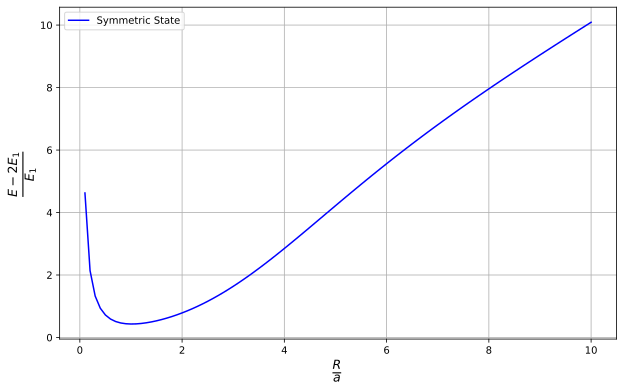

In [1]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from matplotlib import pyplot as plt
from IPython.display import display, HTML
import numpy as np
from scipy.special import exp1

#off.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))
display(HTML("""
<script type="text/javascript" async
  src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
</script>
"""))

def j_prime(x):
    return (1 - (1 + x) * np.exp(-2 * x)) / x

def k_prime(x):
    return (1 + x) * np.exp(-x)

def s(x):
    return (1 + x + x**2 / 3) * np.exp(-x)

def l(x):
    return ((2 * x + 1 / 4 + 5 / (8 * x) * np.exp(-x)) - (1 / 4 + 5 / (8 * x) * np.exp(-3 * x))) / 2

m = 5/8

def a(x):
    return 6 / x * ((np.euler_gamma + np.log(x)) * s(x)**2 - exp1(4 * x) * s(-x)**2 + 2 * exp1(2 * x) * s(x) * s(-x))

def b(x):
    return (-25/8 + 23/4 * x + 3 * x**2 + x**3 / 3) * np.exp(-2 * x)

def j(x):
    return 1/x - 1/2 * (2 / x + 11 / 4 + 3 / 2 * x + x**2 / 3) * np.exp(-2 * x)

def k(x):
    return a(x) - b(x)

def energy(x):
    return 1 / (2*x) - (j_prime(x) + k_prime(x)) / (1 + s(x)) + (j(x) + 2 * k(x) + 4 * l(x) + m) / (4 * (1+s(x))**2)

# energy_vectorized = np.vectorize(energy)

x = np.linspace(0.1, 10, 100)

energy_total = energy(x)

plt.figure(figsize=(10, 6))
plt.plot(x, energy_total, label="Symmetric State", color='blue')
plt.xlabel("$\\frac{R}{a}$", fontsize="18")
plt.ylabel("$\\frac{E-2E_1}{E_1}$", fontsize="18")
plt.legend()
plt.grid(True)
plt.show()